# Домашняя работа 1
## В данном задании мы будем сжимать звуковую дорожку при помощи алгоритма PCA

In [1]:
# Понадобится для чтения и записи аудио файлов
from scipy.io import wavfile

# Это нужно для проигрывания аудио файлов прямо в блокноте
from IPython.display import Audio

# А это набор для этого задания
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Скачаем данные
! wget https://www.dropbox.com/s/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav

--2022-12-16 11:37:15--  https://www.dropbox.com/s/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav [following]
--2022-12-16 11:37:15--  https://www.dropbox.com/s/raw/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc012e75d019d98ba693487cd5b5.dl.dropboxusercontent.com/cd/0/inline/BysNHNe9eoGLos21kBTQrsj7o1hN0fI4VZJ8pLbuj1Dr20rpPrvkwdtQj4CB2BwF33wpH9kZDmouUjiJbMUvWpKG66P-o14fc5vmoxU4mg_lZDH0mDx1kof7r-sRrK69mkB2ae6FhNw58uCIoPpKbJUi0UTg5sNIleDF2WZIsRwskQ/file# [following]
--2022-12-16 11:37:16--  https://uc012e75d

In [3]:
# Прочитаем аудио дорожку при помощи wavfile
samplerate, data = wavfile.read('Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav')

`samplerate` есть частота дискретизации - стандартное для аудио значние -- 44100 Гц.

NOTE: **Частота дискретизации** говорит о том, сколько последовательных элементов массива с сигналом кодируют звук длительностью 1 секунда.

Подробнее о кодировании звука [тут](https://ru.wikipedia.org/wiki/Кодирование_звуковой_информации).

In [4]:
# Посмотрим какая у нас частота диспретезации
print(samplerate)

44100


In [5]:
# Если поделить длину массива сигнала на samplerate, получится длительность аудиодорожки в секундах

print(len(data) / samplerate)

# 45 секунд - похоже на правду:)

45.139591836734695


In [6]:
# Заметим, что звук - стерео, так как сигнал кодируется двумя каналами (для левого и правого динамика):

print(data.shape)

(1990656, 2)


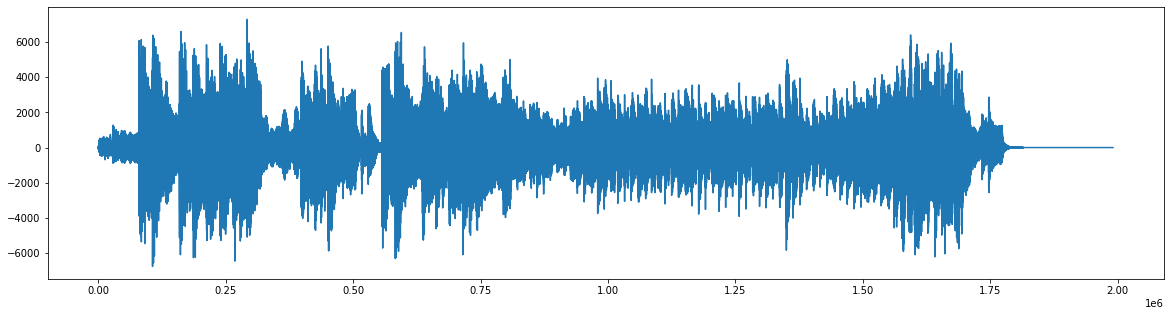

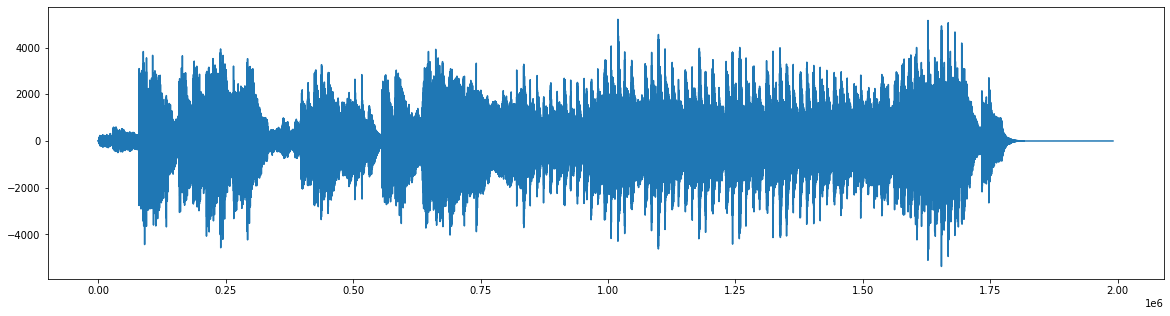

In [7]:
# Отрисуем сигналы в обоих каналах

# Канал 1
plt.figure(figsize=(20,5))
plt.plot(data[:,0])
plt.show()

# Канал 2
plt.figure(figsize=(20,5))
plt.plot(data[:,1])
plt.show()

In [8]:
# Усредним каналы, и получим моно звук, с которым будет проще работать

mono_sound = np.mean(data, axis=1)
print(mono_sound.shape)

(1990656,)


In [9]:
# Давайте послушаем наконец, что же мы будем сжимать:)

Audio(mono_sound, rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# Для удобства - обрежем массив с сигналом так, чтобы его было удобнее делить на равные части, датасет из которых и необходимо будет сжать известными вам методами.
# На самом деле способ очень похож на тот, которым мы сжимали картинку, деля её на прямоугольные подкартинки, только здесь задача еще проще)

mono_sound_to_cut = mono_sound[:1990000]

In [11]:
# Проверим, что наш звук теперь это просто вектор числел

print(mono_sound_to_cut.shape)

(1990000,)


#### Задание 1:

**Подсказка:** В это задании нужно всего лишь вспомнить как пользоваться методом `.reshape()`


1. Разделите сигнал на равные части (длину каждой части возьмите равной 1000) и соберите из них "датасет", который будет представлять из себя двухменый массив - "матрицу", в которой каждая часть сигнала длины 1000 находится в отдельной строке).

    То есть первая часть содержит первые 1000 чисел сигнала и находится в первой строке матрицы, вторая часть следующие 1000 чисел сигнала и находится во второй строке матрицы и так далее.

    Это также как мы делали с кусочками картинки и получали матрицу размера `(24, 1152000)`!

In [14]:
# Ваше решение здесь
X = mono_sound_to_cut.reshape((1990000 // 1000, 1000))
X

array([[  0. ,  -1. ,  -1. , ...,  88.5,  58.5,  18. ],
       [-25.5, -61.5, -81.5, ...,  30.5, -20.5, -53. ],
       [-67.5, -65.5, -50. , ..., 118.5, 118.5,  86.5],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

2. Напишите функцию, которая будет переводить вашу "матрицу" обратно в звуковой сигнал, то есть разворачивать данные обратно из матрицы размера `(число объектов, 1000)` в вектор длины `(число объектов * 1000)`. Проверьте, что все работает верно, путем воспроизведения "востановленного" сигнала -- он должен совпасть в точности с изначальным (ведь им на самом деле и является).

In [61]:
# Ваше решение здесь
mono_sound_to_cut.reshape((-1))

array([ 0., -1., -1., ...,  0.,  0.,  0.])

#### Задание 2

Подсказка: код этого пункта практически полностью совпадает с кодом, который мы использовали на семинаре.

1. Выполните PCA преобразование нашей матрицы, и получите данные, сжатые в пространство меньшей размерности.

    На этом этапе у нас есть наш "датасет" с 1000 "признаками" и мы хотим уменьшить число "признаков" путем применения метода PCA. Число компонент предлагается выбрать вам, но для начала не стоит брать слишком маленькое число, чтобы потом было проще понять, в случае плохого результата -- компонент оказалось недостаточно или вы где-то ошиблись:)


In [15]:
pca = PCA(n_components=700)
Y = pca.fit_transform(X)



2. Постройте сами две главные компоненты в наглядной форме. Сделайте выводы исходя из их вида.

    То есть необходимо применить метод PCA к нашей матрице с числом компонент, равным 2 (тем самым получив датасет с 2 "признаками"). Это позволит нам отрисовать данные на плоскости, чтобы попытаться уловить зависимости.

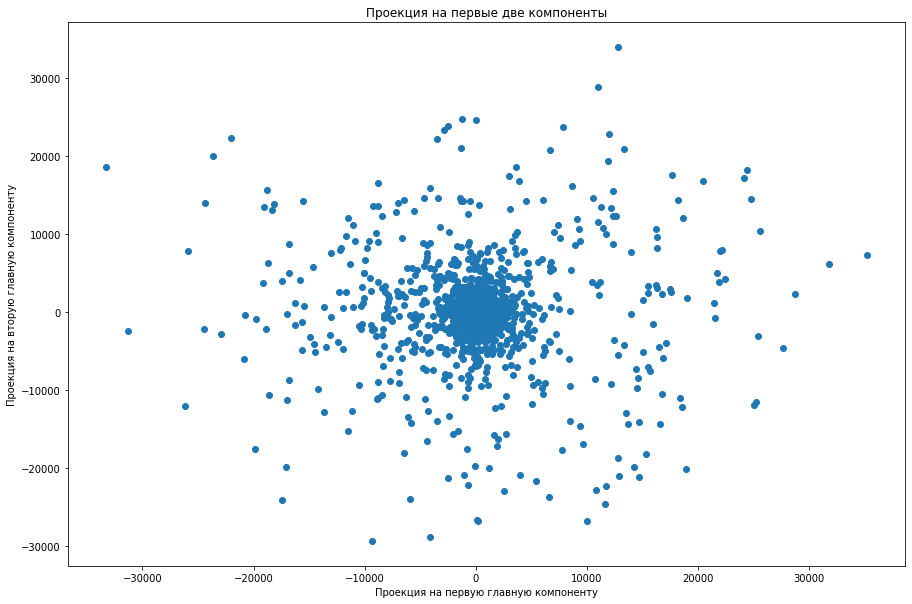

In [16]:
pca = PCA(n_components=2)
Y = pca.fit_transform(X)
plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1])
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.title('Проекция на первые две компоненты')
plt.show()

3. Постройте scatter plot датасета в пространстве первых двух компонент, а третью используйте как цвет.
    То есть необходимо применить метод PCA уже с 3 компонентами и нарисовать опять точки, только передав третью компоненту в качестве цвета. (мы также делали на семинаре с картинкой)

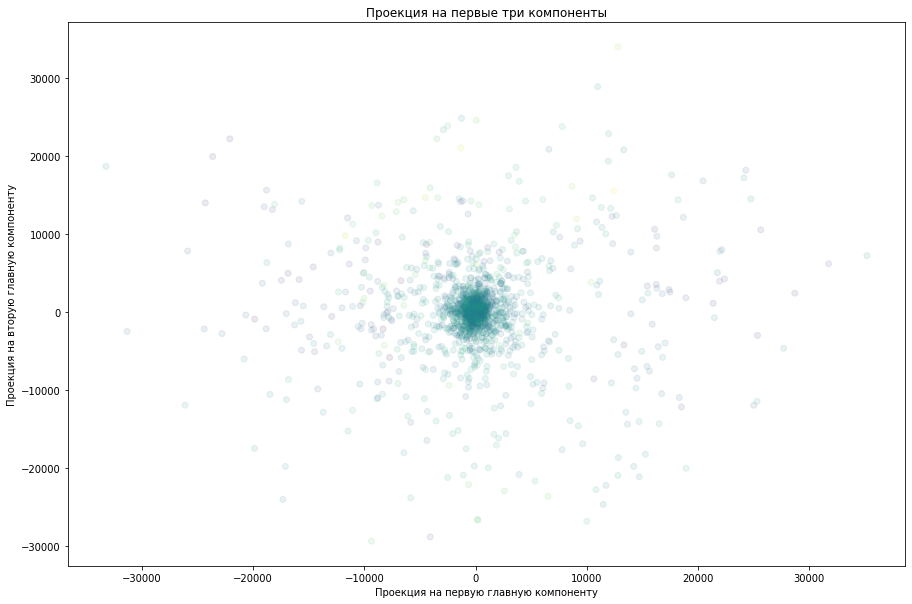

In [18]:
pca = PCA(n_components=3)
Y = pca.fit_transform(X)
plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], c=Y[:, 2], alpha=0.1)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.title('Проекция на первые три компоненты')
plt.show()

#### Задание 3

Нам осталось заняться непосредственно "сжатием" звука и проверкой правильности наших действий.

1. Выполните обратное PCA преобразование сжатых данных и получите "матрицу" с сжатым звуком.

    Воспользуйтесь обратным преобразованием PCA (inverse_transform), чтобы из матрицы размера `(число объектов, число компонент)` перейти в матрицу размера `(число объектов, 1000)`.

In [58]:
# Ваше решение здесь
pca = PCA(n_components=500)
Y = pca.fit_transform(X)
X_restored = pca.inverse_transform(Y)

2. Преобразуйте "матрицу", получившуюся обратным преобразованием, в сигнал (одномерный массив, наш "сжатый" монозвук), и послушайте результат `(Audio(YOUR_RESULT, rate = samplerate)`.

    Воспользуйтесь функцией, которую написали в первом задании, чтобы преобразовать матрицу с "сжатым" звуком (размер после обратного преобразования должен быть такой же, как и у оригинальной матрицы) в вектор-сигнал, который уже можно будет прослушать. Если звук похож на оригинал, то вы все сделали правильно! 

In [59]:
# Ваше решение здесь
mono_sound_compressed = X_restored.reshape((-1))

3. Исследуйте зависимость качества звука от числа компонент. Подберите "на слух" минимальное число компонент, при котором звук практически не отличается от оригинала.

    Добавьте в ячейки два варианта звуковой дорожки -- оригинальную и выбранную вами. Укажите какое число компонент вы оставили.

Подсказка! попробуйте отфильтровать сигнал с помощью функции `gaussian_filter1d` из `scipy.ndimage`. Это поможет убрать неприятный дробовой шум при сильном сжатии

Пример кода для фильтрации - `Audio(gaussian_filter1d(mono_sound_compressed, 2), rate = samplerate)`

In [60]:
# Ваше решение здесь
from scipy.ndimage import gaussian_filter1d

Audio(gaussian_filter1d(mono_sound_compressed, 2), rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.


3.1   Ответьте на вопросы: 
- Количество компонент, которое вы выбрали это много или мало? 
- Как сильно можно сжать звук таким образом? 
- А если нам дадут другую звуковую дорожку, нам надо сделать то же самое, чтобы сжать звук, как автоматически подобрать число компонент и возможно ли это?




In [ ]:
# Ваше решение здесь
""" Я считаю, что последнее выбранное количество компонент(500) это много для данной аудиодорожки.
 Сжать звук без особой потери можно +- до 200 компонент, со 100 звук начинает хрипеть  """

4. (доп задание)

  a) Оберните получившийся код по сжатию звука в одну или несколько функций

  b) Проведите исследование того, как степень сжатия (соотношения размера частей, на которые делился сигнал в задании 1.1 к размеру пространсва, в которое вы сжимали данные с помощью PCA) влияет на звук, по субъективным ощущениям. Начиная с какой степени сжания сильно слышится потеря качества? (как с учетом фильтрации с помощью gaussian_filter1d, так и без неё)

  d) Что степень сжатия означает для PCA? Для большой аудиозаписи (3 мин, например) мы хотели бы разбить на большее, меньшее или такое же число отрезков как и для предложенной аудиозаписи? Почему?

  c) Можно ли как-то автоматически подобрать степерь сжатия? За что она отвечает в нашей задаче. Как степень сжатия влияет на звук? Почему она так влияет на звук? 



In [ ]:
# Ваше решение здесь